In [1]:
import pandas as pd
from openpyxl import load_workbook
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA


In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
#file_path = 'path/to/your/datasetclustering.xlsx'
#df = pd.read_excel(r'datasetclustering.xls')

df = pd.read_excel(r'dataset_digunakan.xls')
df





,no,diagnosa,institusi,area,tipe,biaya_berobat
0,1,jantung,poliklinik,garut,dokter umum,50001 s.d 200000
1,2,jantung,poliklinik,garut,dokter umum,50001 s.d 200000
2,3,jantung,poliklinik,garut,dokter umum,50001 s.d 200000
3,4,jantung,rumah sakit,bandung,spesialis penyakit dalam,200001 s.d 500000
4,5,jantung,poliklinik,garut,dokter umum,50001 s.d 200000
...,...,...,...,...,...,...
844,845,mata,poliklinik,garut,spesialis mata,200001 s.d 500000
845,846,sakit perut,rumah sakit,garut,dokter umum,500001 s.d 1000000
846,847,gerd,rumah sakit,garut,dokter umum,1000001 s.d 3000000
847,848,gigi,rumah sakit,sukabumi,spesialis gigi dan mulut,50001 s.d 200000


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
df = df.drop('no', axis=1)

In [25]:
df

,diagnosa,institusi,area,tipe,biaya_berobat
0,jantung,poliklinik,garut,dokter umum,50001 s.d 200000
1,jantung,poliklinik,garut,dokter umum,50001 s.d 200000
2,jantung,poliklinik,garut,dokter umum,50001 s.d 200000
3,jantung,rumah sakit,bandung,spesialis penyakit dalam,200001 s.d 500000
4,jantung,poliklinik,garut,dokter umum,50001 s.d 200000
...,...,...,...,...,...
844,mata,poliklinik,garut,spesialis mata,200001 s.d 500000
845,sakit perut,rumah sakit,garut,dokter umum,500001 s.d 1000000
846,gerd,rumah sakit,garut,dokter umum,1000001 s.d 3000000
847,gigi,rumah sakit,sukabumi,spesialis gigi dan mulut,50001 s.d 200000


In [ ]:
# Extract the relevant columns for clustering
#X = df[['diagnosa_encod', 'institusi_encod', 'area_encod', 'tipe_encod', 'biaya_berobat_encod']]


In [26]:
from sklearn.preprocessing import LabelEncoder

# Mengasumsikan dataset Anda adalah df dan kolom 'diagnosa' adalah kategorik
df = df.copy() # Membuat salinan dataset untuk mencegah modifikasi dataset asli

# Label encoding untuk kolom 'diagnosa'
encoder = LabelEncoder()
df['diagnosa_encod'] = encoder.fit_transform(df['diagnosa'])
df['institusi_encod'] = encoder.fit_transform(df['institusi'])
df['area_encod'] = encoder.fit_transform(df['area'])

df['tipe_encod'] = encoder.fit_transform(df['tipe'])
df['biaya_berobat_encod'] = encoder.fit_transform(df['biaya_berobat'])

In [27]:
df

,diagnosa,institusi,area,tipe,biaya_berobat,diagnosa_encod,institusi_encod,area_encod,tipe_encod,biaya_berobat_encod
0,jantung,poliklinik,garut,dokter umum,50001 s.d 200000,20,2,6,0,4
1,jantung,poliklinik,garut,dokter umum,50001 s.d 200000,20,2,6,0,4
2,jantung,poliklinik,garut,dokter umum,50001 s.d 200000,20,2,6,0,4
3,jantung,rumah sakit,bandung,spesialis penyakit dalam,200001 s.d 500000,20,3,1,17,1
4,jantung,poliklinik,garut,dokter umum,50001 s.d 200000,20,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...
844,mata,poliklinik,garut,spesialis mata,200001 s.d 500000,28,2,6,13,1
845,sakit perut,rumah sakit,garut,dokter umum,500001 s.d 1000000,35,3,6,0,3
846,gerd,rumah sakit,garut,dokter umum,1000001 s.d 3000000,14,3,6,0,0
847,gigi,rumah sakit,sukabumi,spesialis gigi dan mulut,50001 s.d 200000,15,3,15,10,4


In [28]:
# prompt: menyalin dataset pada df ke df lainnya

df2 = df.copy()


In [29]:
df = df.drop(['diagnosa', 'institusi', 'area', 'tipe', 'biaya_berobat'], axis=1)

In [30]:
df

,diagnosa_encod,institusi_encod,area_encod,tipe_encod,biaya_berobat_encod
0,20,2,6,0,4
1,20,2,6,0,4
2,20,2,6,0,4
3,20,3,1,17,1
4,20,2,6,0,4
...,...,...,...,...,...
844,28,2,6,13,1
845,35,3,6,0,3
846,14,3,6,0,0
847,15,3,15,10,4


In [31]:
# prompt: pisahkan atribut pada df

# Separate the attributes into a separate variable
x = df.iloc[:, 1:].values
x = StandardScaler().fit_transform(x)

In [32]:
pca = PCA(n_components=2)
pct = pca.fit_transform(x)
principal_df = pd.DataFrame(pct,columns=['pc1_atribut','pc2_atribut'])

In [34]:
principal_df

,pc1_atribut,pc2_atribut
0,-1.140912,-0.815974
1,-1.140912,-0.815974
2,-1.140912,-0.815974
3,2.306620,-0.252358
4,-1.140912,-0.815974
...,...,...
844,0.995628,0.789757
845,-0.342897,-0.851374
846,0.514261,0.422567
847,-0.373549,0.210685


In [38]:
x = principal_df[['pc1_atribut', 'pc2_atribut']].values
print(x)

[[-1.14091228 -0.81597431]
 [-1.14091228 -0.81597431]
 [-1.14091228 -0.81597431]
 ...
 [ 0.51426142  0.42256742]
 [-0.37354859  0.21068504]
 [ 0.48360976  1.48462662]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

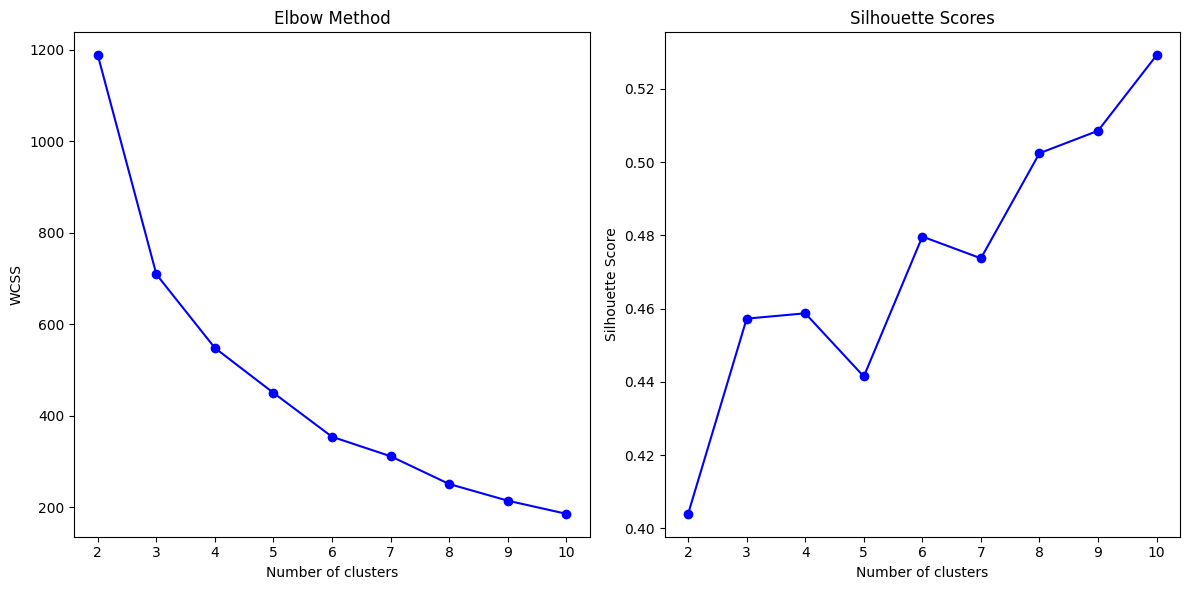

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Elbow Method
wcss = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(x, kmeans.labels_))

# Plot the Elbow Method graph
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(K, wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Plot the Silhouette Scores graph
plt.subplot(122)
plt.plot(K, silhouette_scores, 'bo-')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


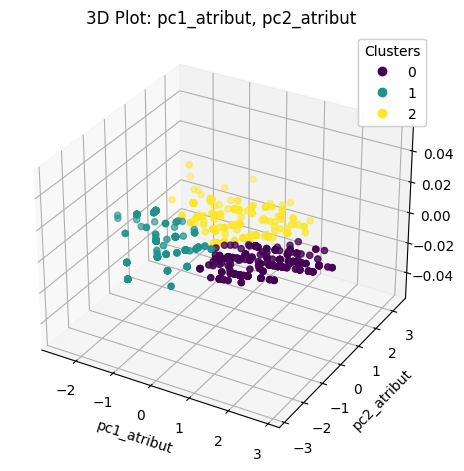

In [48]:
# Define the number of clusters
num_clusters = 3

# Fit KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# Melakukan clustering dengan KMeans untuk k=3
principal_df['cluster'] = kmeans.fit_predict(x)

# Plotting the results in 3D for the first combination: diagnosa_encod, institusi_encod, tipe_encod
fig = plt.figure(figsize=(12, 6))

# First subplot
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(principal_df['pc1_atribut'], principal_df['pc2_atribut'],
                       c=principal_df['cluster'], cmap='viridis')
ax1.set_title('3D Plot: pc1_atribut, pc2_atribut')
ax1.set_xlabel('pc1_atribut')
ax1.set_ylabel('pc2_atribut')
legend1 = ax1.legend(*scatter1.legend_elements(), title="Clusters")
ax1.add_artist(legend1)

plt.show()

# Save the clustered data to a new Excel file
#df.to_excel('clustered_dataset.xlsx', index=False)

In [49]:
principal_df

,pc1_atribut,pc2_atribut,cluster
0,-1.140912,-0.815974,1
1,-1.140912,-0.815974,1
2,-1.140912,-0.815974,1
3,2.306620,-0.252358,0
4,-1.140912,-0.815974,1
...,...,...,...
844,0.995628,0.789757,2
845,-0.342897,-0.851374,1
846,0.514261,0.422567,2
847,-0.373549,0.210685,2


In [53]:
labels = kmeans.fit_predict(x)

# Menghitung Davies-Bouldin Index (DBI) untuk k=4
dbi_score = davies_bouldin_score(x, labels)
print("Davies-Bouldin Index (DBI) for k=3:", dbi_score)

Davies-Bouldin Index (DBI) for k=3: 0.7984772114634282


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
# prompt: mengambil df kolom diagnosa,	institusi,	area,	tipe,	biaya_berobat dan principal_df kolom cluster, lalu menggabungkannya jadi 1

df_combined = pd.concat([df2[['diagnosa', 'institusi', 'area', 'tipe', 'biaya_berobat']], principal_df['cluster']], axis=1)
df_combined


,diagnosa,institusi,area,tipe,biaya_berobat,cluster
0,jantung,poliklinik,garut,dokter umum,50001 s.d 200000,1
1,jantung,poliklinik,garut,dokter umum,50001 s.d 200000,1
2,jantung,poliklinik,garut,dokter umum,50001 s.d 200000,1
3,jantung,rumah sakit,bandung,spesialis penyakit dalam,200001 s.d 500000,0
4,jantung,poliklinik,garut,dokter umum,50001 s.d 200000,1
...,...,...,...,...,...,...
844,mata,poliklinik,garut,spesialis mata,200001 s.d 500000,2
845,sakit perut,rumah sakit,garut,dokter umum,500001 s.d 1000000,1
846,gerd,rumah sakit,garut,dokter umum,1000001 s.d 3000000,2
847,gigi,rumah sakit,sukabumi,spesialis gigi dan mulut,50001 s.d 200000,2


In [58]:
# Download dalam bentuk excel
from google.colab import files
df_combined.to_excel('datasetclustering.xlsx')
files.download('datasetclustering.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>